In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the raw data from the github url

df = pd.read_csv("https://raw.githubusercontent.com/suneel0101/lesson-plan/master/crunchbase_monthly_export.csv")

In [3]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,|Credit|Technology|Services|Finance|,Credit,"750,000",NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaN,NaN,NaN,NaN,1/1/10,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,Entertainment,"1,750,000",acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012.0,6/30/12,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"4,000,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,6/4/10,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Education,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012.0,8/9/12,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Apps,"1,500,000",operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011.0,4/1/11,4/1/11,NaN


#### 1. Clean the data. Use .apply and lambda functions where you can

- rename the columns to remove spaces and extra characters

In [4]:
# df.columns.values returns an array
# pd.Series makes it into a series, which then has the 'function' .str
# .str allows string functions to be applied on the series
# .strip() removes whitespace from the front and end of a string

df.columns = pd.Series(df.columns.values).str.strip()

- convert the funding, year founded, and funding_rounds columns to integers

    - this does not make sense for the later part
    - converting to floats where np.nan is required

In [7]:
# df['funding_total_usd'] contains strings
# extra white space in front and at the end
# -
# numbers separated by ,

def get_amt(x):
    # remove white space
    x = x.strip()
    
    # replace ,
    x = x.replace(',', '')
    
    # replace -
    if '-' in x:
        return np.nan
    else:
        return float(x)

In [8]:
df['funding_total_usd'] = df['funding_total_usd'].apply(get_amt)

In [9]:
# df['founded_year'] contains floats
# because np.nan is treated as a float
# lambda function: returns x if x is bigger than zero
# only np.nan should fail

df['founded_year'] = df['founded_year'].apply(lambda x: int(x) if x > 0 else np.nan)

In [10]:
df['funding_rounds'].dtype

dtype('int64')

- convert category_list so that each cell is a list of categories

In [11]:
# items in category_list are separated by |
# and they also start and end with |
# .strip('|') removes the start and end |
# .split('|') splits the remaining data into a list using | as a separator

df['category_list'] = df['category_list'].apply(lambda x: str(x).strip('|').split('|'))

- use value_counts on market, status, and country_code to check for any repeats or misnamed entries

    - I'm skipping this because:  
        - there are too many entries in 'market' and what's the criteria for grouping categories together?
        - status does not appear to have any misnamed entries
        - I can't tell if there are errors in country codes

- BONUS: convert the date columns to appropriate datetime objects

In [12]:
df.dtypes

permalink             object
name                  object
homepage_url          object
category_list         object
market                object
funding_total_usd    float64
status                object
country_code          object
state_code            object
region                object
city                  object
funding_rounds         int64
founded_at            object
founded_month         object
founded_quarter       object
founded_year         float64
first_funding_at      object
last_funding_at       object
Unnamed: 18          float64
dtype: object

In [13]:
df['founded_at'] = pd.to_datetime(df['founded_at'])

In [14]:
# coerce means that if there are errors, it just returns a null value (NaT)
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], 'coerce')

In [15]:
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], 'coerce')

In [16]:
df['founded_month'] = df['founded_month'].apply(lambda x: pd.Period(x, freq='M'))

In [17]:
df['founded_quarter'] = df['founded_quarter'].apply(lambda x: pd.Period(x, freq='Q'))

#### 2. Using isnull(), take a subset of the dataframe that has no founded at date

In [18]:
df[df['founded_at'].isnull()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,"[Credit, Technology, Services, Finance]",Credit,750000.0,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaT,NaT,NaN,2010-01-01,2010-01-01,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,[Games],Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,NaN,2010-06-04,2010-09-23,NaN
7,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,[Advertising],Advertising,4912393.0,closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaT,NaT,NaT,NaN,2007-01-16,2007-01-16,NaN
12,/organization/1-4-all,1-4 All,NaN,"[Entertainment, Games, Software]",Entertainment,NaN,operating,USA,NC,North Carolina,Connellys Springs,1,NaT,NaT,NaT,NaN,2013-04-21,2013-04-21,NaN
19,/organization/1000jobboersen-de,1000jobboersen.de,http://www.1000jobboersen.de,[Curated Web],Curated Web,NaN,operating,DEU,NaN,Berlin,Berlin,1,NaT,NaT,NaT,NaN,2011-09-16,2011-09-16,NaN
24,/organization/100du-tv,100du.tv,http://www.100du.com,[Hospitality],Hospitality,3000000.0,operating,NaN,NaN,NaN,NaN,2,NaT,NaT,NaT,NaN,2008-01-07,2010-08-13,NaN
25,/organization/100e-com,100e.com,http://www.100e.com,[Education],Education,3000000.0,operating,CHN,NaN,Beijing,Beijing,1,NaT,NaT,NaT,NaN,2006-01-01,2006-01-01,NaN
31,/organization/10six,10Six,http://10sixenergy.com,[nan],NaN,NaN,operating,USA,NY,New York City,New York,1,NaT,NaT,NaT,NaN,2013-02-01,2013-02-01,NaN
32,/organization/10tracks,10tracks,http://10tracks.com,[nan],NaN,40000.0,NaN,NaN,NaN,NaN,NaN,1,NaT,NaT,NaT,NaN,2013-03-01,2013-03-01,NaN
35,/organization/115-network-disks,115 network disks,http://www.115.com/,[Education],Education,NaN,operating,NaN,NaN,NaN,NaN,1,NaT,NaT,NaT,NaN,2011-11-01,2011-11-01,NaN


#### 3. Create a new column, founded_year_x, that's a copy of founded_year. Then, replace all the missing values with either the mean , mode, or median of that column. 
Add a note explaining which statistic you picked and why:

In [19]:
df['founded_year_x'] = df['founded_year'].fillna(df['founded_year'].median()).astype(int)

- Median was picked
- Since this refers to a year, it doesn't make sense to take the mean

#### 4. Take a subset of US-based companies using boolean selection

In [20]:
df[df['country_code'] == 'USA']

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,Unnamed: 18,founded_year_x
1,/organization/waywire,#waywire,http://www.waywire.com,"[Entertainment, Politics, Social Media, News]",Entertainment,1750000.0,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012Q2,2012.0,2012-06-30,2012-06-30,NaN,2012
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,[Games],Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaT,NaN,2010-06-04,2010-09-23,NaN,2009
5,/organization/n-plusn,#NAME?,http://plusn.com,[Software],Software,600000.0,operating,USA,NY,New York City,New York,1,2012-01-01,2012-01,2012Q1,2012.0,2012-08-29,2012-08-29,NaN,2012
6,/organization/club-domains,.Club Domains,http://nic.club/,[Software],Software,7000000.0,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011Q4,2011.0,2013-05-31,2013-05-31,NaN,2011
9,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,[Software],Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01,2010Q1,2010.0,2014-07-24,2014-07-24,NaN,2010
10,/organization/0xdata,0xdata,http://www.0xdata.com,[Analytics],Analytics,1700000.0,operating,USA,CA,SF Bay Area,Mountain View,1,2011-01-01,2011-01,2011Q1,2011.0,2013-01-03,2013-01-03,NaN,2011
12,/organization/1-4-all,1-4 All,NaN,"[Entertainment, Games, Software]",Entertainment,NaN,operating,USA,NC,North Carolina,Connellys Springs,1,NaT,NaT,NaT,NaN,2013-04-21,2013-04-21,NaN,2009
13,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,[Health and Wellness],Health and Wellness,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986Q1,1986.0,2010-08-19,2010-08-19,NaN,1986
14,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,[Health and Wellness],Health and Wellness,1750000.0,operating,USA,NJ,Newark,Iselin,1,1984-01-01,1984-01,1984Q1,1984.0,2011-03-02,2011-03-02,NaN,1984
15,/organization/1-618-technology,1.618 Technology,NaN,[Real Estate],Real Estate,NaN,operating,USA,FL,Orlando,Orlando,1,2013-12-07,2013-12,2013Q4,2013.0,2014-01-22,2014-01-22,NaN,2013


#### 5. Create a pivot table showing total, mean, and median funding amount by year

In [21]:
pd.pivot_table(df, index='founded_year_x', values='funding_total_usd', aggfunc=[sum, np.mean, np.median])

,sum,mean,median
founded_year_x,,,
1900,2.365031e+07,2.365031e+07,23650306.0
1902,3.100000e+06,3.100000e+06,3100000.0
1903,9.300000e+06,9.300000e+06,9300000.0
1906,1.137800e+09,2.275600e+08,10000000.0
1908,5.814700e+06,5.814700e+06,5814700.0
1910,1.000000e+05,1.000000e+05,100000.0
1911,2.400000e+06,2.400000e+06,2400000.0
1912,1.357000e+08,3.392500e+07,6100000.0
1913,1.011508e+08,5.057539e+07,50575389.5


#### 6. Create a pivot table showing total, mean and median funding amount by market

In [22]:
pd.pivot_table(df, index='market', values='funding_total_usd', aggfunc=[sum, np.mean, np.median])

,sum,mean,median
market,,,
3D,5.513635e+08,9.189392e+06,1200000.0
3D Printing,9.835000e+06,1.967000e+06,2000000.0
3D Technology,NaN,NaN,NaN
Accounting,1.233243e+09,1.989102e+07,2592000.0
Active Lifestyle,2.460500e+07,4.100833e+06,275000.0
Ad Targeting,1.318098e+09,2.486977e+07,3800000.0
Advanced Materials,5.550000e+07,5.550000e+07,55500000.0
Adventure Travel,1.876635e+06,1.706032e+05,145000.0
Advertising,2.011370e+10,1.195821e+07,2077974.5


#### 7. CHALLENGE: Using matplotlib, create a scatter plot showing funding amount on the y-axis, and first_funding_date on the x-axis
(first_funding_date will need to be a timestamp)

In [84]:
x = df[['funding_total_usd', 'first_funding_at']]

In [85]:
x = x.dropna()

In [90]:
x['year'] = x['first_funding_at'].apply(lambda x: 1960 if x.year == 2060 else x.year).astype(str)
x['month'] = x['first_funding_at'].apply(lambda x: x.month).astype(str)
x['day'] = x['first_funding_at'].apply(lambda x: x.day).astype(str)

In [91]:
x['date'] = x['year'] + '-' + x['month'] + '-' + x['day']

In [92]:
x['date'] = pd.to_datetime(x['date'])

In [114]:
y = x[(x['year'].astype(int) > 1990)]

In [115]:
y = y[(y['year'].astype(int) < 2010)]

In [118]:
y =  y[y.funding_total_usd < y.funding_total_usd.max()]

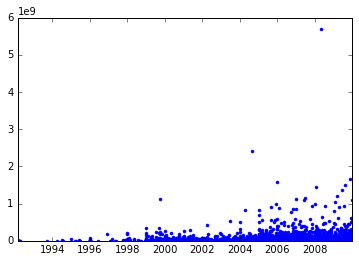

In [119]:
a = y['funding_total_usd']
b = y['date']
plt.plot(b, a, '.')

#### 8. Here's the fun part. Create a hypothesis based on your data that you can reasonably test. 
For example: "Credit companies based in the US that only get 1 round of funding tend to receive more funding than companies based outside the US"



When you have your hypothesis, write it below, and Slack it to the instructors so we can check in. 

In [123]:
df2 = df.copy()

In [127]:
df2.dropna(how='all', axis=1, inplace=True)

In [132]:
df2.dropna(inplace=True)

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16454 entries, 1 to 44949
Data columns (total 19 columns):
permalink            16454 non-null object
name                 16454 non-null object
homepage_url         16454 non-null object
category_list        16454 non-null object
market               16454 non-null object
funding_total_usd    16454 non-null float64
status               16454 non-null object
country_code         16454 non-null object
state_code           16454 non-null object
region               16454 non-null object
city                 16454 non-null object
funding_rounds       16454 non-null int64
founded_at           16454 non-null datetime64[ns]
founded_month        16454 non-null object
founded_quarter      16454 non-null object
founded_year         16454 non-null float64
first_funding_at     16454 non-null datetime64[ns]
last_funding_at      16454 non-null datetime64[ns]
founded_year_x       16454 non-null int64
dtypes: datetime64[ns](3), float64(2), int64(2), o

In [135]:
import seaborn as sns

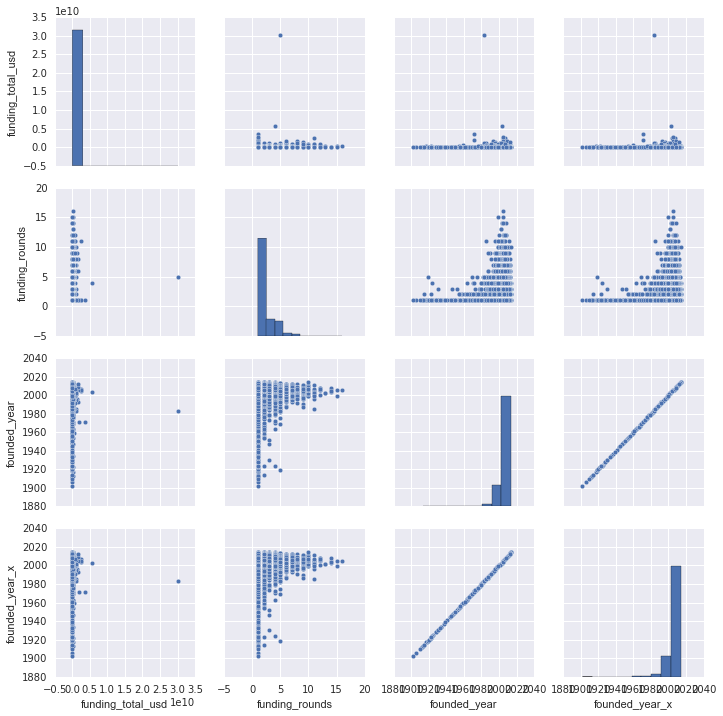

In [136]:
sns.pairplot(df2)

#### 9. Test your hypothesis. 

You'll need to evaluate your hypothesis using a t-test (see Monday's lecture 1.3), so make sure you have enough data compare samples. If your original hypothesis is too narrow, you may need to broaden the scope.

#### 10. CHALLENGE
- Plot the distribution of both samples
- Explain your results in one short sentence. 
- Explain your result in a slighly longer technical paragraph, touching on the statistics you presented. 
- Subset your findings: if you looked at a certain market in a certain geography, break it down by another variable (e.g number of funding rounds) and compare those samples. 